In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv("loan_approval_dataset.csv")

In [3]:
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [4]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [5]:
data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [6]:
data[' loan_status'].value_counts()

 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

Checking for Outliers

<Axes: xlabel=' residential_assets_value'>

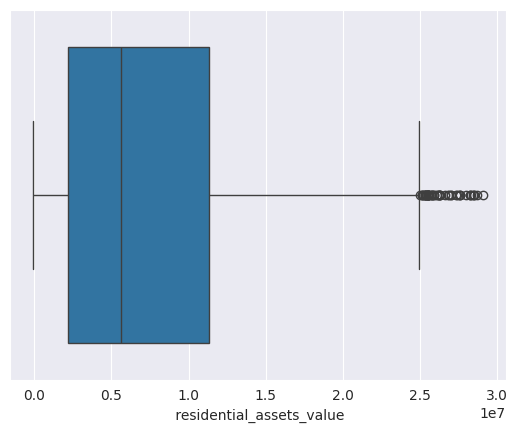

In [7]:
sns.boxplot(x=data[' residential_assets_value'])

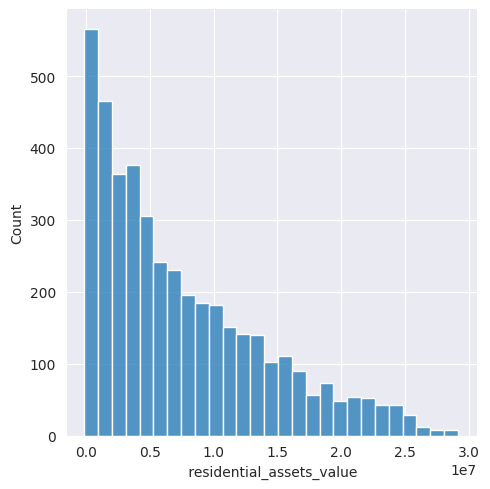

In [8]:
sns.displot(data[' residential_assets_value'])

There are outliers present in **"residential_assets_value"**

Removing Outliers with IQR method

In [9]:
q1=data[' residential_assets_value'].quantile(0.25)
q2=data[' residential_assets_value'].quantile(0.75)
q1,q2

(np.float64(2200000.0), np.float64(11300000.0))

In [10]:
IQR=q2-q1

In [11]:
max_val=q2+1.5*IQR

In [12]:
data1=data[data[' residential_assets_value']<max_val]
data1

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4217 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4217 non-null   int64 
 1    no_of_dependents          4217 non-null   int64 
 2    education                 4217 non-null   object
 3    self_employed             4217 non-null   object
 4    income_annum              4217 non-null   int64 
 5    loan_amount               4217 non-null   int64 
 6    loan_term                 4217 non-null   int64 
 7    cibil_score               4217 non-null   int64 
 8    residential_assets_value  4217 non-null   int64 
 9    commercial_assets_value   4217 non-null   int64 
 10   luxury_assets_value       4217 non-null   int64 
 11   bank_asset_value          4217 non-null   int64 
 12   loan_status               4217 non-null   object
dtypes: int64(10), object(3)
memory usage: 461.2+ KB


<Axes: xlabel=' residential_assets_value'>

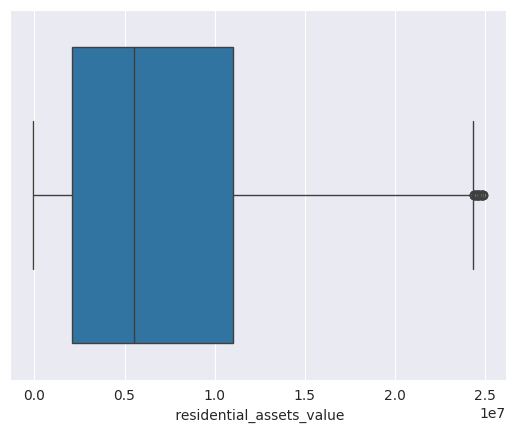

In [14]:
sns.boxplot(x=data1[' residential_assets_value'])

Outliers have been removed

In [15]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4217 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4217 non-null   int64 
 1    no_of_dependents          4217 non-null   int64 
 2    education                 4217 non-null   object
 3    self_employed             4217 non-null   object
 4    income_annum              4217 non-null   int64 
 5    loan_amount               4217 non-null   int64 
 6    loan_term                 4217 non-null   int64 
 7    cibil_score               4217 non-null   int64 
 8    residential_assets_value  4217 non-null   int64 
 9    commercial_assets_value   4217 non-null   int64 
 10   luxury_assets_value       4217 non-null   int64 
 11   bank_asset_value          4217 non-null   int64 
 12   loan_status               4217 non-null   object
dtypes: int64(10), object(3)
memory usage: 461.2+ KB


In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
lbl=LabelEncoder()

In [18]:
lbl.fit(data1[[' education']])

/home/hammadali08/PycharmProjects/Loan Approval Prediction/.venv/lib64/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [19]:
df=pd.DataFrame(lbl.transform(data1[[' education']]))
df

/home/hammadali08/PycharmProjects/Loan Approval Prediction/.venv/lib64/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


,0
0,0
1,1
2,0
3,0
4,1
...,...
4212,0
4213,1
4214,1
4215,1


In [20]:
data1[' education']=df
data1

/tmp/ipykernel_26782/2606082482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[' education']=df


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0.0,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,1.0,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,0.0,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,0.0,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,1.0,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,NaN,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,NaN,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,NaN,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,NaN,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [21]:
data1[' education'].isnull().sum()

np.int64(51)

In [22]:
data1.fillna(data1[' education'].mean(),inplace=True)

/tmp/ipykernel_26782/3772470047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.fillna(data1[' education'].mean(),inplace=True)


In [23]:
lbl.fit(data1[[' self_employed']])

/home/hammadali08/PycharmProjects/Loan Approval Prediction/.venv/lib64/python3.13/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [24]:
df1=pd.DataFrame(lbl.transform(data1[' self_employed']))
df1

,0
0,0
1,1
2,0
3,0
4,1
...,...
4212,1
4213,1
4214,0
4215,0


In [25]:
data1[' self_employed']=df1
data1.fillna(data1[' self_employed'].mean(),inplace=True)

/tmp/ipykernel_26782/2952151276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[' self_employed']=df1
/tmp/ipykernel_26782/2952151276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.fillna(data1[' self_employed'].mean(),inplace=True)


In [26]:
data1

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0.000000,0.000000,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,1.000000,1.000000,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,0.000000,0.000000,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,0.000000,0.000000,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,1.000000,1.000000,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,0.496399,0.503841,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,0.496399,0.503841,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,0.496399,0.503841,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,0.496399,0.503841,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [27]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4217 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_id                    4217 non-null   int64  
 1    no_of_dependents          4217 non-null   int64  
 2    education                 4217 non-null   float64
 3    self_employed             4217 non-null   float64
 4    income_annum              4217 non-null   int64  
 5    loan_amount               4217 non-null   int64  
 6    loan_term                 4217 non-null   int64  
 7    cibil_score               4217 non-null   int64  
 8    residential_assets_value  4217 non-null   int64  
 9    commercial_assets_value   4217 non-null   int64  
 10   luxury_assets_value       4217 non-null   int64  
 11   bank_asset_value          4217 non-null   int64  
 12   loan_status               4217 non-null   object 
dtypes: float64(2), int64(10), object(1)
memory usage: 461

In [28]:
x=data1.iloc[:,:-1]
y=data1[' loan_status']

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
ss=StandardScaler()
ss.fit(x)

,copy,True
,with_mean,True
,with_std,True


In [54]:
x=ss.transform(x)
x

array([[-1.73195167, -0.29476684, -0.99888316, ...,  2.90822503,
         0.85264051,  0.95349869],
       [-1.73113977, -1.47467361,  1.01337373, ..., -0.62663346,
        -0.68349979, -0.5043283 ],
       [-1.73032787,  0.29518654, -0.99888316, ..., -0.09870005,
         2.02408563,  2.44234328],
       ...,
       [ 1.73160974, -0.29476684,  0.        , ...,  1.71463645,
         0.34427753,  0.73637552],
       [ 1.73242163, -0.88472023,  0.        , ..., -0.97093786,
        -0.09777723,  0.27111159],
       [ 1.73323353, -0.88472023,  0.        , ...,  1.57691469,
         2.28931849,  2.19420251]], shape=(4217, 12))

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=53)

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
lg=LogisticRegression()

In [59]:
lg.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [60]:
lg.score(x_test,y_test)

0.9075829383886256

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
confusion_matrix(y_test,lg.predict(x_test))

array([[489,  40],
       [ 38, 277]])

<Axes: >

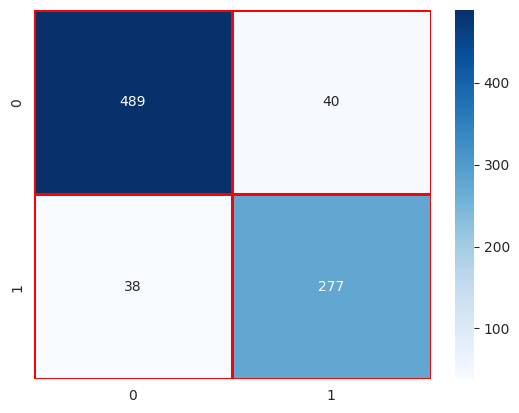

In [73]:
sns.heatmap(confusion_matrix(y_test,lg.predict(x_test)),annot=True,fmt="d",linecolor='red',linewidths=1,cmap='Blues')